# ***Level 1: Project 1: EDA on Retail Sales***

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing the dataset
df = pd.read_csv("/content/Retail Sales - infobyte.csv")
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
# Performing descriptive statistics
print(df.info())
print("------------------------------")
print("Descriptive Statistics:")
print(df.describe())
print("------------------------------")
print("Checking for null values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB
None
------------------------------
Descriptive Statistics:
             Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.00000

In [ ]:
# Removing duplicates from dataset
df = df.drop_duplicates()

In [ ]:
# Since Order Date column is not in date format, so change the datatype
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
print(df['Order Date'].dtypes)

datetime64[ns]


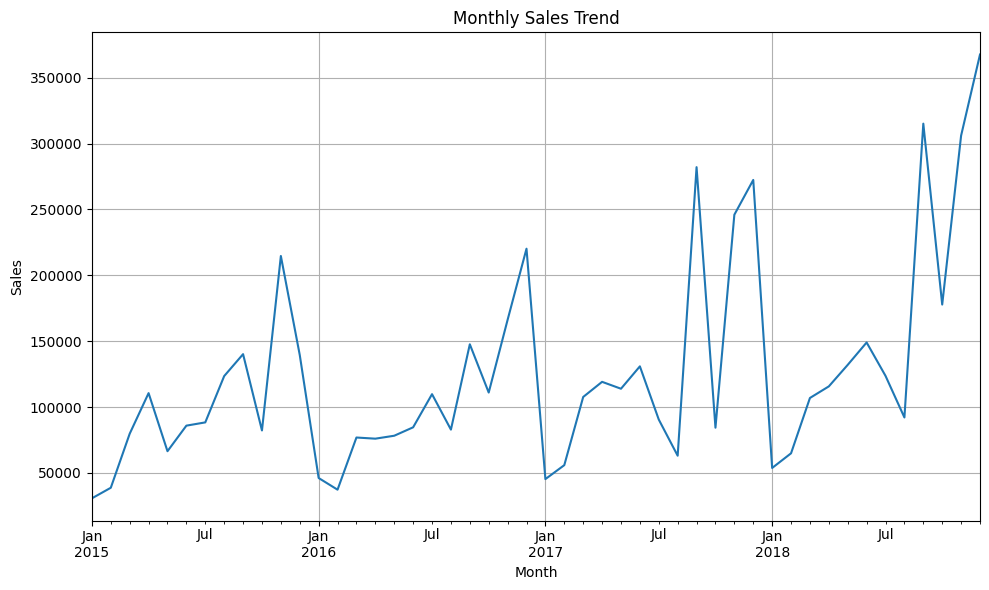

In [ ]:
# Performing time series analysis to analyze sales trends
monthly_sales = df.resample('M', on = 'Order Date')['Sales'].sum()
plt.figure(figsize=(10,6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Customer and Product Analysis
#1. Top customers by total sales
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print('Top 10 Customers:\n', top_customers)

Top 10 Customers:
 Customer Name
Krithika    334361
Amrish      333351
Verma       331665
Arutra      325720
Vidya       321798
Vinne       319565
Shah        318588
Suresh      315973
Adavan      315341
Surya       312645
Name: Sales, dtype: int64


In [ ]:
# Sales by category and sub-categroy
cat_sales = df.groupby(['Category', 'Sub Category'])['Sales'].sum().sort_values(ascending=False)
print(cat_sales)

Category           Sub Category      
Beverages          Health Drinks         1051439
                   Soft Drinks           1033874
Snacks             Cookies                768213
Bakery             Breads & Buns          742586
Snacks             Noodles                735435
                   Chocolates             733898
Oil & Masala       Masalas                697480
Bakery             Cakes                  685612
                   Biscuits               684083
Oil & Masala       Spices                 672876
                   Edible Oil & Ghee      668086
Eggs, Meat & Fish  Mutton                 611200
                   Eggs                   575156
                   Fish                   560548
Food Grains        Organic Staples        558929
Fruits & Veggies   Fresh Fruits           551212
Food Grains        Atta & Flour           534649
Fruits & Veggies   Fresh Vegetables       525842
Food Grains        Dals & Pulses          523371
Eggs, Meat & Fish  Chicken     

In [ ]:
# Sales by Region
region_sales = df.groupby(df['Region'])['Sales'].mean().sort_values(ascending=True)
print('Average Region sales:\n', region_sales)

Average Region sales:
 Region
North      1254.000000
East       1491.702247
Central    1492.964270
West       1498.202623
South      1507.387894
Name: Sales, dtype: float64


In [ ]:
# Profit by State
state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False)
print('State by Profit:', state_profit)

State by Profit: State
Tamil Nadu    3747121.2
Name: Profit, dtype: float64


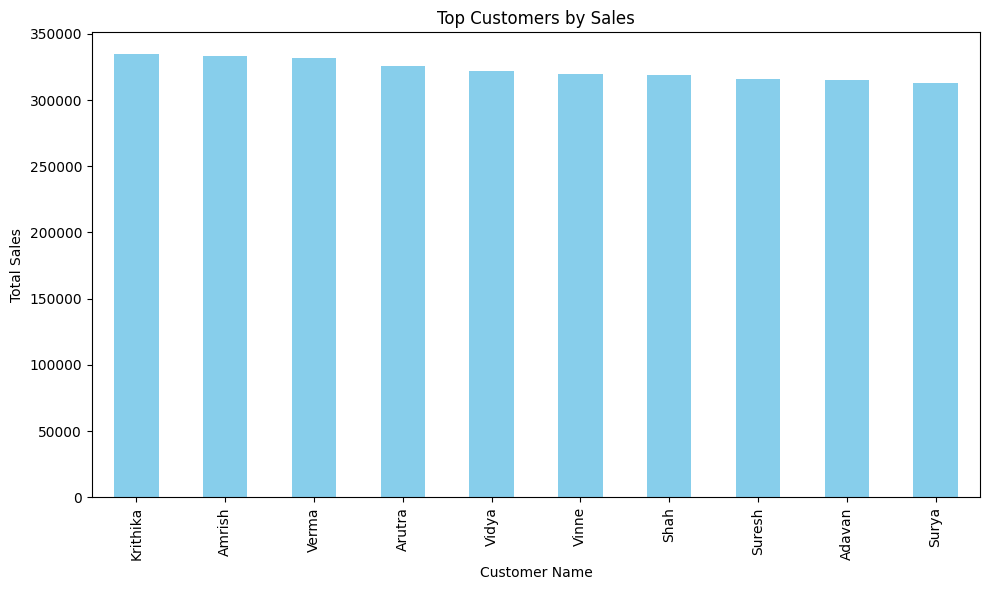

In [ ]:
# Visualizations
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top Customers by Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

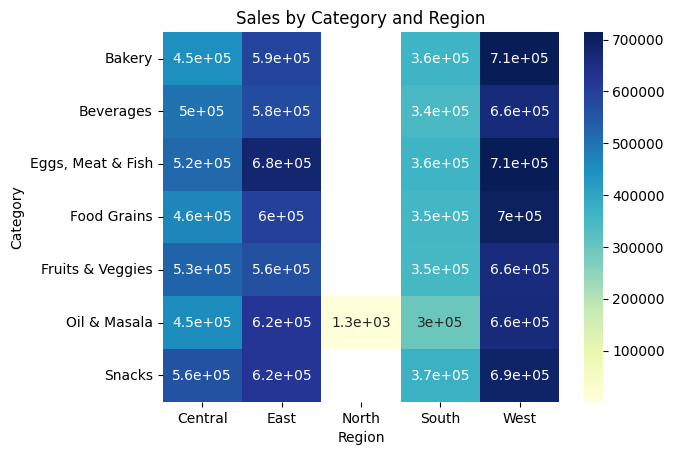

In [ ]:
pivot_table = df.pivot_table(index='Category', values = 'Sales', columns = 'Region',aggfunc='sum')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Sales by Category and Region')
plt.show()

In [ ]:
# Recommendations
'''
1. Focus on top 10 customers - providing exclusive offers and loyalty programs
2. Trend-based forecasting
3. Identify the cause for low sales in particular regions
'''